<a href="https://colab.research.google.com/github/Manikandaprabu123/Naan-Muthalvan/blob/main/Spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE
from tabulate import tabulate
from mpl_toolkits.mplot3d import Axes3D
# Step 1: Load the dataset
data = pd.read_csv('/content/drive/MyDrive/genres_v2.csv')

<ipython-input-8-67c875d55dc3>:10: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/genres_v2.csv')


In [9]:
numerical_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
data = data.dropna(subset=numerical_features)  # Remove rows with missing values in these features

# Scale the numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[numerical_features])

# Apply KMeans clustering
kmeans = KMeans(n_clusters=10, random_state=42)  # 10 clusters as an example
data['cluster'] = kmeans.fit_predict(scaled_features)

# Define the Recommendation Function
def recommend_songs(song_name, data, num_recommendations=5):
    # Check if the song exists in the dataset
    if song_name not in data['song_name'].values:
        print("Song name not found in the dataset.")
        return None

    # Identify the cluster of the input song
    song_cluster = data.loc[data['song_name'] == song_name, 'cluster'].values[0]

    # Retrieve songs from the same cluster, excluding the input song
    cluster_songs = data[(data['cluster'] == song_cluster) & (data['song_name'] != song_name)]

    # Limit the number of recommendations if needed
    num_recommendations = min(num_recommendations, len(cluster_songs))

    # Randomly select the recommendations from the same cluster
    recommended_songs = cluster_songs.sample(num_recommendations)
    return recommended_songs

# Visualization Function using PCA
def visualize_recommendations_pca(song_name, data, recommended_songs):
    # Perform PCA on scaled features for 2D visualization
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(scaled_features)
    data['pca_1'], data['pca_2'] = pca_result[:, 0], pca_result[:, 1]

    # Plot clusters
    plt.figure(figsize=(10, 7))
    sns.scatterplot(x='pca_1', y='pca_2', hue='cluster', data=data, palette='viridis', s=50, alpha=0.6, legend=None)

    # Highlight the original song
    original_song = data[data['song_name'] == song_name]
    plt.scatter(original_song['pca_1'], original_song['pca_2'], color='red', s=100, label='Original Song')

    # Highlight recommended songs
    recommended_data = data[data['song_name'].isin(recommended_songs['song_name'])]
    plt.scatter(recommended_data['pca_1'], recommended_data['pca_2'], color='blue', s=100, label='Recommended Songs')

    plt.title("Visualization of Song Clusters and Recommendations")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.legend()
    plt.show()



In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
def display_recommendations_table(recommended_songs):
    # Select specific columns to display
    columns_to_display = ['song_name', 'liveness', 'danceability', 'energy', 'tempo', 'valence']
    recommendations_table = recommended_songs[columns_to_display]

    # Display as table in console
    print("Recommended Songs:")
    print(tabulate(recommendations_table, headers='keys', tablefmt='fancy_grid', showindex=False))

In [12]:
def feature_comparison(song_name, recommended_songs, data):
    original_song = data[data['song_name'] == song_name][numerical_features].mean()
    recommended_avg = recommended_songs[numerical_features].mean()

    feature_df = pd.DataFrame({
        "Original Song": original_song,
        "Recommended Songs": recommended_avg
    })

    feature_df.plot(kind="bar", figsize=(12, 6))
    plt.title("Feature Comparison Between Original and Recommended Songs")
    plt.ylabel("Average Value (Standardized)")
    plt.show()


Enter the song name: Venom
Recommended Songs:
                        song_name    tempo
14096           Hot (feat. Gunna)  111.997
11366                RUN IT BACK!  138.001
958      Toe Tags & Broken Skulls  200.042
10327                         556  150.002
14686  Floating (feat. 21 Savage)  139.932


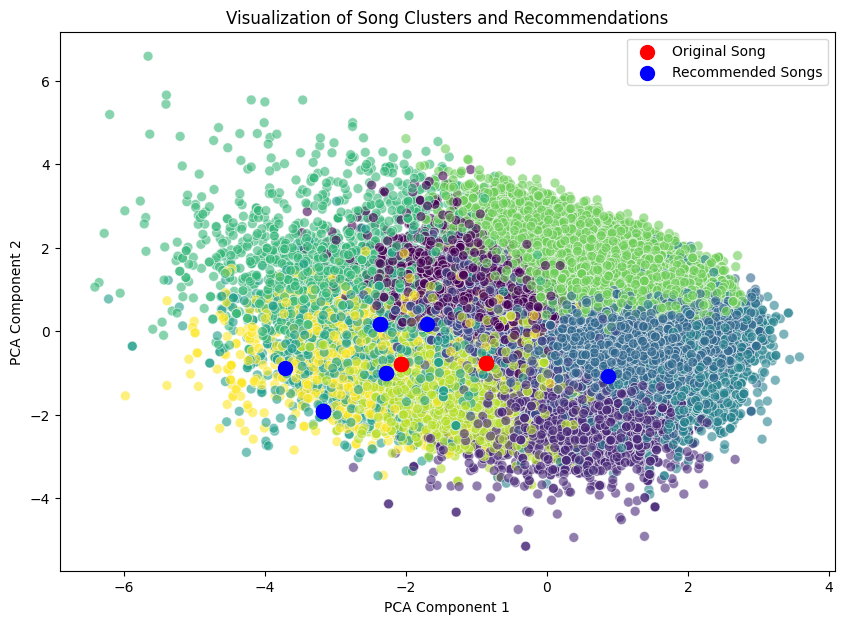

Recommended Songs:
╒════════════════════════════╤════════════╤════════════════╤══════════╤═════════╤═══════════╕
│ song_name                  │   liveness │   danceability │   energy │   tempo │   valence │
╞════════════════════════════╪════════════╪════════════════╪══════════╪═════════╪═══════════╡
│ Hot (feat. Gunna)          │     0.0772 │          0.855 │    0.651 │ 111.997 │     0.559 │
├────────────────────────────┼────────────┼────────────────┼──────────┼─────────┼───────────┤
│ RUN IT BACK!               │     0.185  │          0.867 │    0.403 │ 138.001 │     0.38  │
├────────────────────────────┼────────────┼────────────────┼──────────┼─────────┼───────────┤
│ Toe Tags & Broken Skulls   │     0.362  │          0.871 │    0.407 │ 200.042 │     0.334 │
├────────────────────────────┼────────────┼────────────────┼──────────┼─────────┼───────────┤
│ 556                        │     0.0706 │          0.868 │    0.512 │ 150.002 │     0.715 │
├────────────────────────────┼───────────

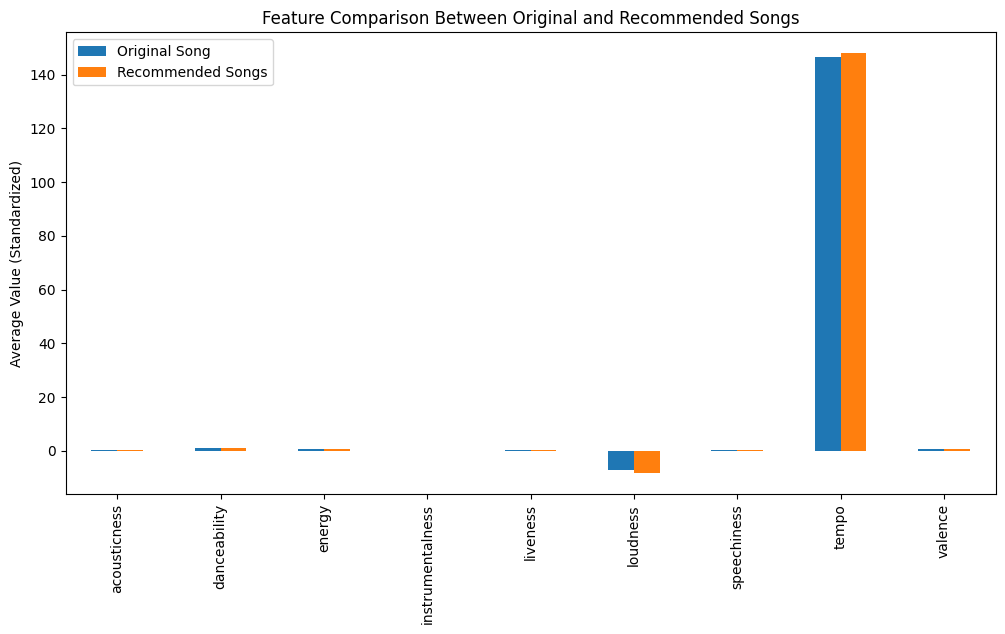

In [18]:
# Example usage
song_name = input("Enter the song name: ")
recommended_songs = recommend_songs(song_name, data)
if recommended_songs is not None:
    print("Recommended Songs:")
    print(recommended_songs[['song_name', 'tempo']])
    visualize_recommendations_pca(song_name, data, recommended_songs)
    display_recommendations_table(recommended_songs)
    feature_comparison(song_name, recommended_songs, data)

Enter the song name: Venom


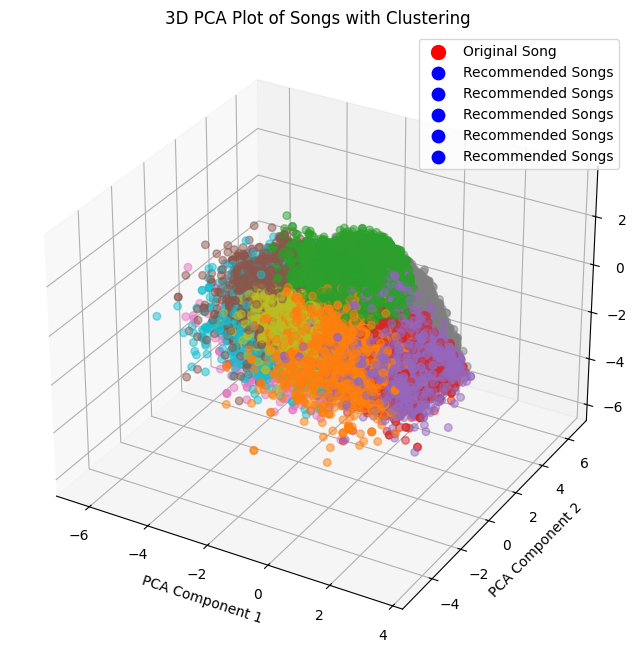

In [17]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import seaborn as sns

# 3D PCA for Dimensionality Reduction
pca_3d = PCA(n_components=3)
pca_result_3d = pca_3d.fit_transform(scaled_features)
data['pca1'] = pca_result_3d[:, 0]
data['pca2'] = pca_result_3d[:, 1]
data['pca3'] = pca_result_3d[:, 2]

# 3D Visualization Function
def visualize_3d_recommendations(song_name, recommended_songs, data):
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot all songs by cluster
    scatter = ax.scatter(data['pca1'], data['pca2'], data['pca3'],
                         c=data['cluster'], cmap='tab10', alpha=0.5, s=30)

    # Highlight the original song
    original_song = data[data['song_name'] == song_name]
    ax.scatter(original_song['pca1'], original_song['pca2'], original_song['pca3'],
               color='red', s=100, label='Original Song', depthshade=True)

    # Highlight recommended songs
    for _, song in recommended_songs.iterrows():
        ax.scatter(song['pca1'], song['pca2'], song['pca3'],
                   color='blue', s=80, label='Recommended Songs', depthshade=True)

    # Labels and Legend
    ax.set_title("3D PCA Plot of Songs with Clustering")
    ax.set_xlabel("PCA Component 1")
    ax.set_ylabel("PCA Component 2")
    ax.set_zlabel("PCA Component 3")
    plt.legend(loc='best')
    plt.show()

# Example Usage
song_name = input("Enter the song name: ")
recommended_songs = recommend_songs(song_name, data)
if recommended_songs is not None:
    visualize_3d_recommendations(song_name, recommended_songs, data)
